In [1]:
# Getting data ready
 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#  Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Import data and remove nan
data = pd.read_csv("data")


In [2]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [3]:
car_sales = pd.read_csv("../data/car-sales-extended-missing-data.csv")

In [4]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [5]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
car_sales.dropna(subset=["Price"],inplace=True)

In [7]:
# Split into x and y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]


In [8]:
# Fill values from sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Creating imputer to filling missing data
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])
filled_data = imputer.fit_transform(X)
filled_data

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [9]:
X = car_sales_filled = pd.DataFrame(filled_data, columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()


,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [10]:
# Now convert labels categorical data to numerical data so it can be trained
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categ_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot",one_hot, categ_features)],
            remainder="passthrough")
trans_X = transformer.fit_transform(X)
trans_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [11]:
# trans_X.head()
y[:6]


0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
5    23883.0
Name: Price, dtype: float64

In [32]:
np.random.seed(2)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trans_X,y, test_size=0.2)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
importance = rfr.feature_importances_
print("Feature Importances:", importance)
score = rfr.score(X_test, y_test)
print("Model Score:", score)


Feature Importances: [0.1362428  0.01749495 0.01146207 0.02762143 0.01104251 0.01604344
 0.02376072 0.01709322 0.02066419 0.03130315 0.01645164 0.00864547
 0.01120064 0.020002   0.63097176]
Model Score: 0.3286463671229548


In [41]:
np.random.seed(2)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trans_X,y, test_size=0.2)
rfr_2 = RandomForestRegressor(n_estimators=500)
rfr_2.fit(X_train, y_train) 
score = rfr_2.score(X_test, y_test)
print("Model Score:", score)


Model Score: 0.3292948011341016


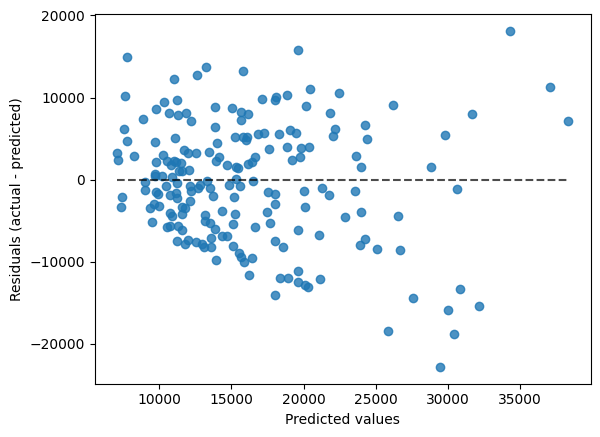

In [14]:
from sklearn.metrics import PredictionErrorDisplay
# y_preds = model.predict(X_test)
# disp = PredictionErrorDisplay(y_true=y_test,y_pred = y_preds) 
# disp.plot()
# plt.show()

dis = PredictionErrorDisplay.from_estimator(rfr, X_test, y_test)

In [18]:

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rfr, X_test, y_test, cv=10)

# y_pred = cross_val_predict(model, X_train, y_train, cv=10)

In [16]:
y_pred.shape, y_train.shape

((190,), (760,))

In [17]:
# np.mean(y_pred == y_train)
y_pred[:7], y_train[:7]

(array([31048.03,  9563.92,  6134.09, 29315.87, 25627.41, 13639.05,
        25864.3 ]),
 806    14084.0
 736    17609.0
 666     9402.0
 525    14086.0
 656    15260.0
 287     9263.0
 429    14312.0
 Name: Price, dtype: float64)

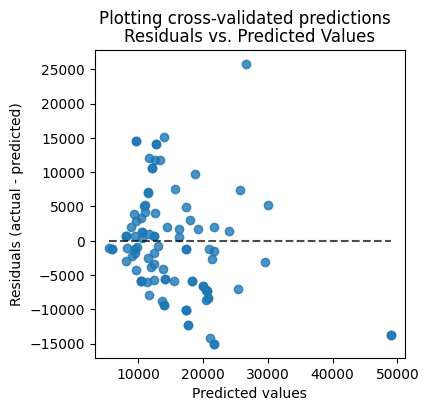

In [19]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots( figsize=(4, 4))
 
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs,
    random_state=0,
)
axs.set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
# plt.tight_layout()
plt.show()

In [22]:
y_preds = rfr.predict(X_test)
y_test[:6] , y_preds[:6]


(953    29551.0
 532    13244.0
 204    16115.0
 144    30412.0
 909    26940.0
 15     16290.0
 Name: Price, dtype: float64,
 array([30657.05, 10233.16, 11057.38, 28870.61, 17133.75,  8858.11]))

# 2 Regression model evaluation metrics
Model evaluation metrics documentation 
1. RA2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity
(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's RA2 value would be 0. And
if your model perfectly predicts a range of numbers it's RA2 value would be 1.

In [23]:
from sklearn.metrics import r2_score
# Fill an array with y test
 
y_test_m= np.full( len(y_test), y_test.mean())
print((y_test_m == np.mean(y_test))[:4])
r2_score(y_test, y_test_m)

[ True  True  True  True]


0.0

In [24]:
r2_score(y_test, y_preds)  == rfr.score(X_test, y_test)

True

### MSE, AND MAE

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)

mse = mean_squared_error(y_test, y_preds)
print("Mean Abs.Error: ",mae)
print("Mean Squ.Error: ",mse)

Mean Abs.Error:  5871.486070600745
Mean Squ.Error:  53133882.505411245


* using cross val score

In [26]:
from sklearn.model_selection import cross_val_score

mae = cross_val_score(rfr, trans_X ,y, cv=5, scoring="neg_mean_absolute_error")
print(mae)
np.mean(mae)

[-6193.19222932 -5828.90714802 -5816.24649392 -5891.33288682
 -6267.22466033]


-5999.380683682191

In [42]:
from sklearn.model_selection import GridSearchCV
grid = {"n_estimators" : [10, 50, 100, 150, 200,250, 500, 1000, 1200]
        # "max_featurs":
       }
n_rfr = RandomForestRegressor(n_jobs=1)
 
gs_rfc = GridSearchCV(estimator=n_rfr, param_grid=grid, cv=5, return_train_score=True, verbose=4)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(trans_X,y, test_size=0.2)

# trans_X.isna().sum()
trans_X[:6]

<6x15 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [44]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END n_estimators=10;, score=(train=0.832, test=0.315) total time=   0.0s
[CV 2/5] END n_estimators=10;, score=(train=0.831, test=0.097) total time=   0.0s
[CV 3/5] END n_estimators=10;, score=(train=0.856, test=0.113) total time=   0.0s
[CV 4/5] END n_estimators=10;, score=(train=0.844, test=0.051) total time=   0.0s
[CV 5/5] END n_estimators=10;, score=(train=0.856, test=0.313) total time=   0.0s
[CV 1/5] END n_estimators=50;, score=(train=0.870, test=0.349) total time=   0.1s
[CV 2/5] END n_estimators=50;, score=(train=0.866, test=0.207) total time=   0.1s
[CV 3/5] END n_estimators=50;, score=(train=0.890, test=0.128) total time=   0.1s
[CV 4/5] END n_estimators=50;, score=(train=0.878, test=0.119) total time=   0.1s
[CV 5/5] END n_estimators=50;, score=(train=0.868, test=0.272) total time=   0.1s
[CV 1/5] END n_estimators=100;, score=(train=0.869, test=0.368) total time=   0.3s
[CV 2/5] END n_estimators=100;, score

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 500, 1000,
                                          1200]},
             return_train_score=True, verbose=4)

In [45]:
gs_rfc.best_params_

{'n_estimators': 150}